In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
pwd

'/Users/shoaibahmed/Downloads/DS 1 2022 PROJECT'

In [3]:
USAccident= pd.read_csv("/Users/shoaibahmed/Downloads/DS 1 2022 PROJECT/Reduced_Finale_dataset_withstates.csv")

In [4]:
USAccident.shape

(88724, 99)

In [5]:
USAccident.head()

,Unnamed: 0,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,Temperature(F),Humidity(%),Pressure(in),...,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,sev
0,0,40.738220,-73.848690,40.741350,-73.841990,0.412,0,46.9,30,30.09,...,0,0,0,0,0,0,0,0,0,2
1,1,37.763453,-77.460447,37.841473,-77.450977,5.415,0,73.0,93,29.72,...,0,0,0,1,0,0,0,0,0,2
2,2,34.167374,-118.300464,34.164603,-118.296685,0.289,0,70.0,9,29.33,...,0,0,0,0,0,0,0,0,0,2
3,3,37.901722,-121.467879,37.901722,-121.467879,0.000,0,71.0,53,29.95,...,0,0,0,0,0,0,0,0,0,2
4,4,33.765910,-117.941955,33.765950,-117.933785,0.469,0,52.0,49,30.11,...,0,0,0,0,0,0,0,0,0,2


In [14]:
USAccident.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)
USAccident.head()

KeyError: "['Unnamed: 0', 'Unnamed: 0.1'] not found in axis"

In [10]:
USAccident.shape

(88724, 98)

# Preliminary Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Correlation Matrix of only Continous numerical values
Z = USAccident[[ 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)','Time_Duration(min)']]
corr = Z.corr()
corr

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Time_Duration(min)
Start_Lat,1.000000,-0.066011,0.999994,-0.066012,0.042674,-0.026520,-0.483785,0.031646,-0.189723,-0.085271,0.035340,-0.036447
Start_Lng,-0.066011,1.000000,-0.066014,0.999999,0.073363,0.059795,0.003229,0.181639,0.183405,0.011892,0.152611,0.048454
End_Lat,0.999994,-0.066014,1.000000,-0.066017,0.042154,-0.026519,-0.483782,0.031652,-0.189724,-0.085271,0.035342,-0.036436
End_Lng,-0.066012,0.999999,-0.066017,1.000000,0.073325,0.059794,0.003230,0.181644,0.183403,0.011898,0.152599,0.048447
Distance(mi),0.042674,0.073363,0.042154,0.073325,1.000000,-0.082306,-0.038982,0.032468,-0.017733,-0.008974,0.006709,0.059759
Side,-0.026520,0.059795,-0.026519,0.059794,-0.082306,1.000000,0.012915,-0.003475,-0.011585,0.015330,0.006536,0.024384
Temperature(F),-0.483785,0.003229,-0.483782,0.003230,-0.038982,0.012915,1.000000,-0.388250,0.160073,0.201805,0.115316,0.066500
Humidity(%),0.031646,0.181639,0.031652,0.181644,0.032468,-0.003475,-0.388250,1.000000,0.128144,-0.371121,-0.183693,-0.014662
Pressure(in),-0.189723,0.183405,-0.189724,0.183403,-0.017733,-0.011585,0.160073,0.128144,1.000000,0.027958,-0.026965,0.104860
Visibility(mi),-0.085271,0.011892,-0.085271,0.011898,-0.008974,0.015330,0.201805,-0.371121,0.027958,1.000000,0.036442,0.026781


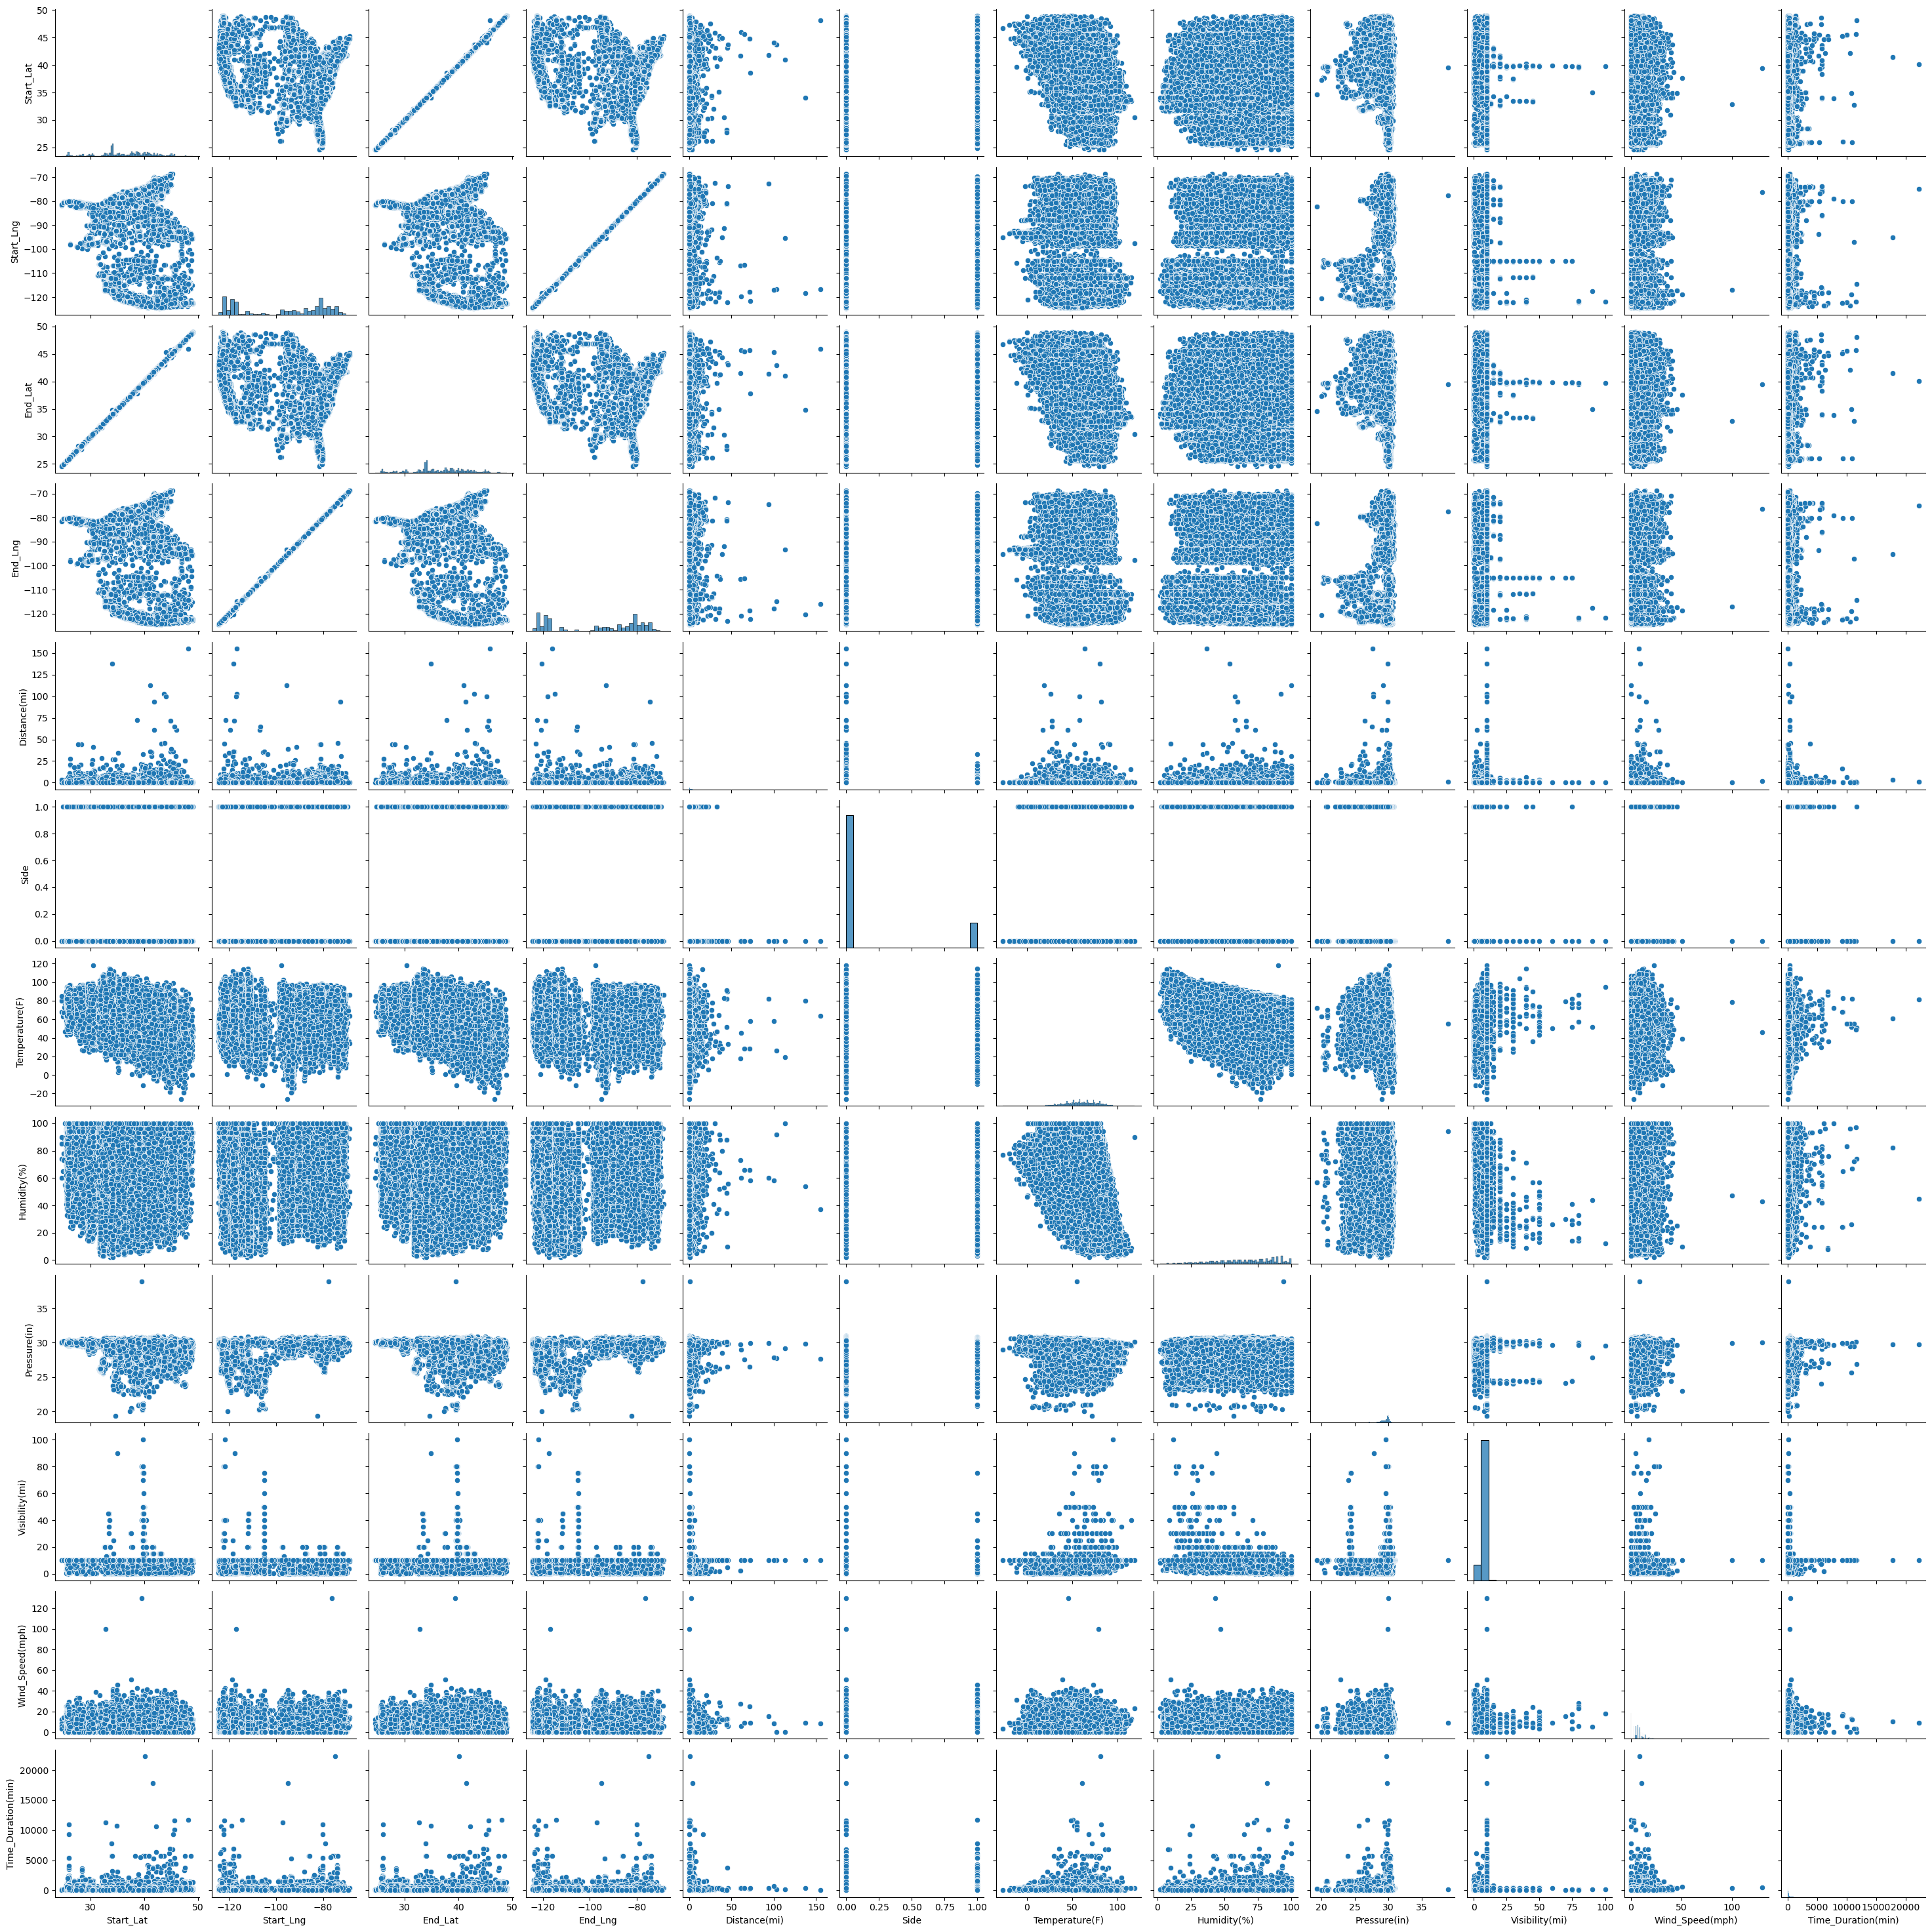

In [12]:
sns.pairplot(Z)

In [13]:
X = USAccident[[ 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Time_Duration(min)', 'Wind_Direction_E', 'Wind_Direction_N',
       'Wind_Direction_NE', 'Wind_Direction_NW', 'Wind_Direction_S',
       'Wind_Direction_SE', 'Wind_Direction_SW', 'Wind_Direction_Variable',
       'Wind_Direction_W', 'Timezone_US/Eastern', 'Timezone_US/Mountain',
       'Timezone_US/Pacific', 'Weather_Condition_Cloudy',
       'Weather_Condition_Fog', 'Weather_Condition_Hail',
       'Weather_Condition_Rain', 'Weather_Condition_Sand',
       'Weather_Condition_Smoke', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Weather_Condition_Windy', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY']]
Y = USAccident['Severity']

KeyError: 'Severity'

In [ ]:
X.shape

In [ ]:
corr = X.corr()
print(corr)

In [ ]:
corr

In [ ]:
corr_matrix = USAccident.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

In [ ]:
import seaborn as sns
import statsmodels.api as sm
X_c=sm.add_constant(X)

model=sm.OLS(Y,X_c)
results=model.fit()
results.summary()

In [ ]:
import timeit
results.pvalues
for predictor in X:
    p = getattr(results.pvalues, predictor)
    print("{}: p value = {:.3f}".format(predictor, p))
    if p < 0.05:
        print("Reject null hypothesis and the predictor is Statistically significant")
    else:
        print("Failed to reject the Null Hypothesis and the predictor is not Statistically Significant")
    print("--------------------------------------------------------------------------------------------------------------")

# Modeling techniques:

# 1) Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

# Logistic regression before scaling

In [ ]:
from sklearn.linear_model import LogisticRegression

#split tha data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y)

#apply logistic regression
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train)
print('The training prediction accuracy for Logistic Regression is '+ str(clf.score(X_train,y_train)))

print('The testing prediction accuracy for Logistic Regression is '+ str(clf.score(X_test,y_test)))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,Y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression after scaling 

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='ovr',max_iter=1000,fit_intercept=False)
clf.fit(X_train_scaled, y_train)
print('The training prediction accuracy for Logistic Regression is '+ str(clf.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Logistic Regression is '+ str(clf.score(X_test_scaled,y_test)))

# Confusion Matrix and Precision, Recall

In [ ]:
from sklearn import metrics

y_pred_test = clf.predict(X_test_scaled)
y_pred_train = clf.predict(X_train_scaled)

print(metrics.confusion_matrix(y_test,y_pred_test))


print(metrics.classification_report(y_test,y_pred_test, digits=2))

# Compare the performance of fitted models (i.e. training error versus testing error).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
clf = LogisticRegression(multi_class='ovr',solver='newton-cg',penalty='none',max_iter=1000,fit_intercept=False,class_weight=None)

clf.fit(X_train_scaled, y_train)
print('The training prediction accuracy for Logistic Regression is '+ str(clf.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Logistic Regression is '+ str(clf.score(X_test_scaled,y_test)))


#######################################
mean_sq_err_val_train = mean_squared_error(y_train,y_pred_train)
mean_sq_err_val_test = mean_squared_error(y_test,y_pred_test)
print('train mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)


# Bias-variance trade-off for hyperparameter optimization of logistic regression

In [ ]:
slvr=['newton-cg', 'lbfgs', 'sag', 'saga']
mean_sq_err_val_train_lst=[]
mean_sq_err_val_test_lst=[]

for i in slvr:
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import accuracy_score

    clf = LogisticRegression(multi_class='ovr',solver=i,max_iter=1000,)


    clf.fit(X_train_scaled, y_train)


    from sklearn.metrics import mean_squared_error
    
    mean_sq_err_val_train = mean_squared_error(y_train,y_pred_train)
    mean_sq_err_val_train_lst.append(mean_sq_err_val_train)

    mean_sq_err_val_test = mean_squared_error(y_test,y_pred_test)
    mean_sq_err_val_test_lst.append(mean_sq_err_val_test)
    print('train mean squared error for '+str(i)+'=',mean_sq_err_val_train)
    print('test mean squared error for '+str(i)+'=',mean_sq_err_val_test)
    
print('\nThe accuracy score for logistic regression model is '+ str(accuracy_score(y_test, y_pred_test)))



In [ ]:
penlty=['l2','none']
mean_sq_err_val_test_lst=[]
mean_sq_err_val_train_lst=[]

for j in penlty:
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import mean_squared_error
    clf = LogisticRegression(multi_class='ovr',solver='newton-cg',penalty=j,max_iter=1000,)


    clf.fit(X_train_scaled, y_train)


    from sklearn.metrics import mean_squared_error
    
    mean_sq_err_val_train = mean_squared_error(y_train,y_pred_train)
    mean_sq_err_val_train_lst.append(mean_sq_err_val_train)

    mean_sq_err_val_test = mean_squared_error(y_test,y_pred_test)
    mean_sq_err_val_test_lst.append(mean_sq_err_val_test)
    print('train mean squared error for '+str(i)+'=',mean_sq_err_val_train)
    print('test mean squared error for '+str(i)+'=',mean_sq_err_val_test)
    
print('\nThe accuracy score for logistic regression model is '+ str(accuracy_score(y_test, y_pred_test)))
plt.figure()

plt.plot([1,2],mean_sq_err_val_train_lst)
plt.plot([1,2],mean_sq_err_val_test_lst)


plt.show()

In [ ]:
clf = LogisticRegression(solver= 'liblinear')
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X,Y,cv=5)

print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
clf = LogisticRegression(solver= 'liblinear')

cv_scores = cross_val_score(clf, X,Y,cv=10)

print('Cross-validation scores :', cv_scores)
print('Mean cross-validation score : {:.3f}'
     .format(np.mean(cv_scores)))

In [ ]:
from sklearn.model_selection import validation_curve

param_range =[1,2,3,4,5]
train_scores, test_scores = validation_curve(LogisticRegression(), X_train_scaled, y_train,param_name = 'C',
                                            param_range=param_range, cv=5)
np.mean(test_scores,axis=1)

In [ ]:
plt.figure()

plt.plot(param_range,np.mean(train_scores,axis=1))
plt.plot(param_range,np.mean(test_scores,axis=1))


plt.show()

# 2) LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis( solver='svd', shrinkage=None, priors=None, store_covariance=False)
LDA.fit(X_train_scaled, y_train)


print('\nThe training prediction accuracy for LDA is  '+ str(LDA.score(X_train_scaled,y_train)))

print('The testing prediction accuracy for LDA is '+ str(LDA.score(X_test_scaled,y_test)))


# Confusion matrix and Precision ,Recall

In [ ]:
from sklearn import metrics

y_pred = LDA.predict(X_test_scaled)

print(metrics.confusion_matrix(y_test,y_pred))


print(metrics.classification_report(y_test,y_pred, digits=2))

# Perform a bias-variance trade-off for hyperparameter optimization of your models.

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [ ]:
#Next, we can explore whether using shrinkage with the model improves performance.

#Shrinkage adds a penalty to the model that acts as a type of regularizer, reducing the complexity of the model.
import numpy as np
import matplotlib
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

print('\nIn this case, we can see that using shrinkage offers no improvement on the accuracy, with a value of 0.0')

In [ ]:
from sklearn.metrics import mean_squared_error
LDA = LinearDiscriminantAnalysis( solver='svd', shrinkage=None, priors=None, store_covariance=False)
LDA.fit(X_train_scaled, y_train)


from sklearn.metrics import mean_squared_error


y_pred_test = LDA.predict(X_test_scaled)
y_pred_train = LDA.predict(X_train_scaled)
#################################\
######
mean_sq_err_val_train = mean_squared_error(y_train, y_pred_train)
mean_sq_err_val_train_lst.append(mean_sq_err_val_train)
    
mean_sq_err_val_test = mean_squared_error(y_test, y_pred_test)
mean_sq_err_val_test_lst.append(mean_sq_err_val_test)
print('train mean squared error for LDA''=',mean_sq_err_val_train)
print('test mean squared error for LDA'+'=',mean_sq_err_val_test)
    
print('\nThe accuracy score for LDA model is '+ str(accuracy_score(y_test, y_pred_test)))

# QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA= QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
print('Accuracy for trainning data is '+ str(QDA.score(X_train,y_train)))
print('Accuracy for testing data is '+ str(QDA.score(X_test,y_test)))
Train = float(QDA.score(X_train,y_train))
Test = float(QDA.score(X_test,y_test))
Train - Test

# 3) KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

KNNreg = KNeighborsClassifier(n_neighbors = 10, weights='uniform', p=2, metric='minkowski')
KNNreg.fit(X_train_scaled, y_train)
print('The training prediction accuracy for KNN is '+ str(KNNreg.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for KNN is '+ str(KNNreg.score(X_test_scaled,y_test)))


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = KNNreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for KNN model is '+ str(accuracy_score(y_test, y_pred_test)))


# Precision and Recall

In [ ]:
ypred_test= KNNreg.predict(X_test_scaled)
ypred_train= KNNreg.predict(X_train_scaled)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=2))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train, ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
hyperparam={'n_neighbors': list(range(1,35))}#, 'weight':('uniform','distance')
KNN = KNeighborsClassifier()
clf = GridSearchCV(KNN, hyperparam, cv=10)

In [ ]:
best_model = clf.fit(X_train_scaled, y_train)

In [ ]:
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
from sklearn.model_selection import cross_val_score
k_range = range(1, 50,5)
k_scores = []

for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train_scaled,y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)


plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# KNN model with the best n_neighbors = 29

In [ ]:
KNNreg = KNeighborsClassifier(n_neighbors = 29, weights='uniform', p=2, metric='minkowski')
KNNreg.fit(X_train_scaled, y_train)
print('The training prediction accuracy for KNN is '+ str(KNNreg.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for KNN is '+ str(KNNreg.score(X_test_scaled,y_test)))


In [ ]:
y_pred = KNNreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for KNN model is '+ str(accuracy_score(y_test, y_pred_test)))


ypred_test= KNNreg.predict(X_test_scaled)
ypred_train= KNNreg.predict(X_train_scaled)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train, ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

# 4) Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

DT = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                           min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                           max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
                         class_weight=None, ccp_alpha=0.0)
DT.fit(X_train_scaled, y_train)
print('The training prediction accuracy for Decision Tree is '+ str(DT.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Decision Tree is '+ str(DT.score(X_test_scaled,y_test)))


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = DT.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for Decision Tree model is '+ str(accuracy_score(y_test, y_pred)))


# Precision and Recall

In [ ]:
ypred_test= DT.predict(X_test_scaled)
ypred_train= DT.predict(X_train_scaled)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=2))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

# Optimization of Hyperparameters

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['int', 'auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 100)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 100, num = 100)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 100)]

# Create the random grid
random_grid = {'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

DT_search = RandomizedSearchCV(DT, random_grid, n_iter=50, cv=10)
DT_search.fit(X_train_scaled, y_train)
bh = DT_search.best_params_
bs = DT_search.best_score_
print(bh)
print(bs)

# Decision Tree with the best parameters

In [ ]:
DT= DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=54,
                           min_samples_split= 89, min_samples_leaf=6,
                           max_features='auto')

DT.fit(X_train_scaled, y_train)

print('The training prediction accuracy for Decision Tree is '+ str(DT.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Decision Tree is '+ str(DT.score(X_test_scaled,y_test)))
 

In [ ]:
y_pred = DT.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for Decision Tree model is '+ str(accuracy_score(y_test, y_pred)))

In [ ]:
ypred_test= DT.predict(X_test_scaled)
ypred_train= DT.predict(X_train_scaled)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=2))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

# 5) Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['int', 'auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 80, num = 80)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 50, num = 50)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 50, num = 50)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

rf_search = RandomizedSearchCV(rf, random_grid, n_iter=40, cv=10)
rf_search.fit(X_train_scaled, y_train)
bh = rf_search.best_params_
bs = rf_search.best_score_
print(bh)
print(bs)

# Random forest with the best parameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 700, min_samples_split = 9, min_samples_leaf = 11, 
                             max_features = 'auto', max_depth = 28, bootstrap = True)

RF.fit(X_train_scaled, y_train)
print('The training prediction accuracy for Random Forest is '+ str(RF.score(X_train_scaled,y_train)))
print('The testing prediction accuracy for Random Forest is '+ str(RF.score(X_test_scaled,y_test)))




In [ ]:
y_pred = RF.predict(X_test_scaled)

from sklearn import preprocessing
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for Random Forest model is '+ str(accuracy_score(y_test, y_pred)))


In [ ]:
ypred_test= RF.predict(X_test_scaled)

ypred_train= RF.predict(X_train_scaled)



from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

# Model Selection

# 1) Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Minmax Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#generating random values for alpha using CV
alpha_list = 15**np.linspace(11, -5, 60)*0.5

Ridgemodel = RidgeCV(alphas=alpha_list, normalize=False, cv=10)
Ridgemodel.fit(X_train_scaled, y_train)
best_alpha = Ridgemodel.alpha_
print('The best alpha value is {:.4f}'.format(Ridgemodel.alpha_))
#After cross validation the best Alpha value is given


best_coeffs = Ridgemodel.coef_

In [ ]:
from sklearn.linear_model import Ridge

linridge = Ridge(alpha = best_alpha).fit(X_train_scaled, y_train)
Ridge2_train = linridge.score(X_train_scaled, y_train)
Ridge2_test = linridge.score(X_test_scaled, y_test)
mse_train = mean_squared_error(y_train, linridge.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, linridge.predict(X_test_scaled))

print('Alpha = {:.3f}, \nR-squared score (Training): {:.2f}, \nR-squared score (Testing): {:.2f}\n'
         .format(best_alpha,Ridge2_train,Ridge2_test))
print('MSE for training data: {:.3f}'.format(mse_train))
print('MSE for testing data: {:.3f}'.format(mse_test))

# 2) Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

#generating random values for alpha using CV
alpha_list = 15**np.linspace(10, -4, 50)*0.5
Lassomodel = LassoCV(alphas=alpha_list, fit_intercept=True, cv=None)
Lassomodel.fit(X_train_scaled, y_train)
print('The Alpha value is {:.3f}'.format(Lassomodel.alpha_))

best_alpha = Lassomodel.alpha_
best_coeffs = Lassomodel.coef_

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score,mean_squared_error
import math

linlasso = Lasso(alpha=best_alpha, max_iter = 10000).fit(X_train_scaled, y_train)
r2_train = linlasso.score(X_train_scaled, y_train)
r2_test = linlasso.score(X_test_scaled, y_test)
#print('Alpha = {:.4f}\nFeatures kept: {}, \nR-squared score (training): {:.3f}, \nR-squared score (test): {:.3f}\n'
         #.format(best_alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

mean_sq_err_val_train = mean_squared_error(y_train, linlasso.predict(X_train_scaled))
mean_sq_err_val_test = mean_squared_error(y_test, linlasso.predict(X_test_scaled))


print('Features with non-zero weight:')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('{}, {:.3f}'.format(e[0], e[1]))
        

#print('\nRMSE for training data: {:.3f}'.format(mean_sq_err_val_train))
print("\n")
print('RMSE : {:.3f}'.format(math.sqrt(mean_sq_err_val_test)))
print('Test Error: {:.2f}'.format(1 - r2_test))

# 3) PCA

In [ ]:
X_train_scaled.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
X_reduced = pca.fit_transform(X_train_scaled)
X_reduced_test = pca.transform(X_test_scaled)
print(pca.components_.shape)
pd.DataFrame(pca.components_.T).loc[:4,:20]
print(pd.DataFrame(pca.components_,columns=pd.DataFrame(X_train_scaled).columns))
print(X_train_scaled.shape)
print(X_reduced.shape)

In [ ]:
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

In [ ]:
# Variance explained by the principal components
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
pca.explained_variance_

In [ ]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
labels=['PC'+str(u) for u in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1),height=var,tick_label=labels)

plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.figure(figsize=(15,15))
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['int', 'auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 50, num = 50)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

rf_search = RandomizedSearchCV(rf, random_grid, n_iter=40, cv=10)
rf_search.fit(X_reduced, y_pred_train)
bh = rf_search.best_params_
bs = rf_search.best_score_
print(bh)
print(bs)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 163, min_samples_split = 18, min_samples_leaf = 1, 
                             max_features = 'sqrt', max_depth = 31, bootstrap = False)

clf.fit(X_reduced, y_train)
print('The training prediction accuracy for Random Forest is '+ str(clf.score(X_reduced,y_train)))
print('The testing prediction accuracy for Random Forest is '+ str(clf.score(X_reduced_test,y_test)))

y_pred = clf.predict(X_reduced_test)

from sklearn import preprocessing
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nThe accuracy score for Random Forest model is '+ str(accuracy_score(y_test, y_pred)))

##########################
ypred_test= clf.predict(X_reduced_test)

ypred_train= clf.predict(X_reduced)

#######################################

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_test, digits=3))

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,ypred_train)
mean_sq_err_val_test = mean_squared_error(y_test, ypred_test)
print('\ntrain mean squared error=',mean_sq_err_val_train)
print('test mean squared error=',mean_sq_err_val_test)

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LinearRegression

# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 34 principle components, adding one component at the time.
for i in np.arange(1, 35):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('sev')
plt.xlim(xmin=-1);

In [ ]:
X_reduced_test = pca.transform(X_test_scaled)

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced, y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

# 4) PLS

In [ ]:
X_train_scaled.shape

In [ ]:
print(X_reduced.shape)
pd.DataFrame(X_reduced).loc[:4,:5]

In [ ]:
#PLS

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold,cross_val_score

n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = KFold(n_splits=10, shuffle=False)

mse = []

for i in np.arange(1, 35):
    pls = PLSRegression(n_components=i)
    score = cross_val_score(pls, X_train_scaled, y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

plt.plot(np.arange(1, 35), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('sev')
plt.xlim(xmin=-1);
print(mse)

# Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

train_dataset,temp_test_dataset=train_test_split(USAccident, test_size = 0.4)

print(train_dataset.shape)
print(temp_test_dataset.shape)

In [ ]:
test_dataset,valid_dataset= train_test_split(temp_test_dataset,test_size=0.5)

print (test_dataset.shape)
print(valid_dataset.shape)

In [ ]:
print(f"Display the datatype of the test_dataset:{type(test_dataset)}")
print(f" Train dataset : {train_dataset.shape}")
print(f" Test dataset : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

In [ ]:
train_stats=train_dataset.describe()
train_stats.pop("Severity")
train_stats=train_stats.transpose()
train_stats

In [ ]:
train_labels1=train_dataset.pop('Severity')
test_labels1=test_dataset.pop('Severity')
valid_labels1=valid_dataset.pop('Severity')

In [ ]:
train_labels=pd.get_dummies(train_labels1,prefix='Label')
valid_labels=pd.get_dummies(valid_labels1,prefix='Label')
test_labels=pd.get_dummies(test_labels1,prefix='Label')

train_labels

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data = sc.fit_transform(train_dataset)
test_data = sc.fit_transform(test_dataset)
valid_data=sc.fit_transform(valid_dataset)

In [ ]:
def build_model1_two_hidden_layers():
    model = Sequential()
    model.add(Dense(16, input_shape=(train_data.shape[1],))) # input shape is (features,)
    model.add(Dense(4, activation='softmax'))

    learning_rate=0.0001
    optimizer=optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, 
              metrics=['accuracy'])
    return model
    

EPOCHS=50
batch_size=16

model=build_model1_two_hidden_layers()
print('Here is the summary of this model:')
model.summary()

In [ ]:
with tf.device('/CPU:0'):
    history=model.fit(train_data,
                      train_labels,
                     batch_size=batch_size,
                     epochs=EPOCHS,
                     verbose=1,
                     shuffle=True,
                     steps_per_epoch=int(train_data.shape[0]/batch_size),
                     validation_data=(valid_data,valid_labels),
                     )

In [ ]:
import pandas as pd
print('Summary of the results after each epoch:')
hist=pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.tail()

In [ ]:
example_batch=test_data[:10]
example_result=model.predict(example_batch)
print('predicted values:')
example_result

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Cross-Validation'],loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train','Cross-Validation'],loc='upper right')
plt.show()

In [ ]:
print('Train Split:')
loss, accuracy=model.evaluate(train_data,train_labels,verbose=1)

print("Accuracy : {:5.2f}".format(accuracy))

In [ ]:
print('Evaluation Split:')
loss, accuracy=model.evaluate(valid_data,valid_labels,verbose=2)

print("Accuracy : {:5.2f}".format(accuracy))

In [ ]:
print('Test Split:')
loss, accuracy=model.evaluate(test_data,test_labels,verbose=2)

print("Accuracy : {:5.2f}".format(accuracy))